# 라이브러리

In [1]:
import os
from google.cloud import storage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gcsfs
import seaborn as sns
import numpy as np
import datetime
import gc
import psutil

In [2]:
%pip install pandas pyarrow gcsfs

%pip install gcsfs==2024.6.1 s3fs==2024.6.1 fsspec==2024.6.1 pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install google-cloud-storage
!python --version

Note: you may need to restart the kernel to use updated packages.
Python 3.11.6


## 불러오기

In [4]:
process = psutil.Process(os.getpid())
print(f"💾 메모리 사용량: {process.memory_info().rss / 1024 ** 2:.2f} MB")

💾 메모리 사용량: 237.90 MB


In [5]:
# GCS에서 Parquet 파일 불러오기
hackle_events = pd.read_parquet("gs://sprintda05_final_project/processed/hackle_events_processed.parquet", engine='pyarrow')
hackle_device_properties = pd.read_parquet("gs://sprintda05_final_project/hackle/device_properties.parquet", engine='pyarrow')
hackle_user_properties = pd.read_parquet("gs://sprintda05_final_project/hackle/user_properties.parquet", engine='pyarrow')
hackle_properties = pd.read_parquet("gs://sprintda05_final_project/hackle/hackle_properties.parquet", engine='pyarrow')

# 저장할 디렉토리 경로
save_directory = "/home/jovyan/work/data"

# 디렉토리가 존재하지 않으면 생성
os.makedirs(save_directory, exist_ok=True)

# CSV 파일로 저장
hackle_events.to_csv(os.path.join(save_directory, "hackle_events_processed.csv"), index=False)
hackle_device_properties.to_csv(os.path.join(save_directory, "hackle_device_properties.csv"), index=False)
hackle_user_properties.to_csv(os.path.join(save_directory, "hackle_user_properties.csv"), index=False)
hackle_properties.to_csv(os.path.join(save_directory, "hackle_properties.csv"), index=False)

print("모든 파일이 성공적으로 CSV로 저장되었습니다:")
print(f"- hackle_events_processed.csv")
print(f"- hackle_device_properties.csv") 
print(f"- hackle_user_properties.csv")
print(f"- hackle_properties.csv")
print(f"저장 위치: {save_directory}")

모든 파일이 성공적으로 CSV로 저장되었습니다:
- hackle_events_processed.csv
- hackle_device_properties.csv
- hackle_user_properties.csv
- hackle_properties.csv
저장 위치: /home/jovyan/work/data


In [6]:
# GCS에서 Parquet 파일 불러오기 (votes 관련 데이터)
accounts_attendance = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_attendance.parquet", engine='pyarrow')
accounts_blockrecord = pd.read_parquet("gs://sprintda05_final_project/processed/accounts_blockrecord_processed.parquet", engine='pyarrow')
accounts_failpaymenthistory = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet", engine='pyarrow')
accounts_friendrequest = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_friendrequest.parquet", engine='pyarrow')
accounts_group = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_group.parquet", engine='pyarrow')
accounts_nearbyschool = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_nearbyschool.parquet", engine='pyarrow')
accounts_paymenthistory = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_paymenthistory.parquet", engine='pyarrow')
accounts_user_contacts = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user_contacts.parquet", engine='pyarrow')
accounts_pointhistory = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_pointhistory.parquet", engine='pyarrow')
accounts_school = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_school.parquet", engine='pyarrow')
accounts_timelinereport = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_timelinereport.parquet", engine='pyarrow')
accounts_user = pd.read_parquet("gs://sprintda05_final_project/processed/accounts_user_processed.parquet", engine='pyarrow')
accounts_userquestionrecord = pd.read_parquet("gs://sprintda05_final_project/processed/accounts_userquestionrecord_processed.parquet", engine='pyarrow')
accounts_userwithdraw = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_userwithdraw.parquet", engine='pyarrow')
event_receipts = pd.read_parquet("gs://sprintda05_final_project/votes/event_receipts.parquet", engine='pyarrow')
events = pd.read_parquet("gs://sprintda05_final_project/votes/events.parquet", engine='pyarrow')
polls_question = pd.read_parquet("gs://sprintda05_final_project/votes/polls_question.parquet", engine='pyarrow')
polls_questionpiece = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionpiece.parquet", engine='pyarrow')
polls_questionreport = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionreport.parquet", engine='pyarrow')
polls_questionset = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionset.parquet", engine='pyarrow')
polls_usercandidate = pd.read_parquet("gs://sprintda05_final_project/votes/polls_usercandidate.parquet", engine='pyarrow')

# 저장할 디렉토리 경로
save_directory = "/home/jovyan/work/data"

# 디렉토리가 존재하지 않으면 생성
os.makedirs(save_directory, exist_ok=True)

# CSV 파일로 저장
accounts_attendance.to_csv(os.path.join(save_directory, "accounts_attendance.csv"), index=False)
accounts_blockrecord.to_csv(os.path.join(save_directory, "accounts_blockrecord_processed.csv"), index=False)
accounts_failpaymenthistory.to_csv(os.path.join(save_directory, "accounts_failpaymenthistory.csv"), index=False)
accounts_friendrequest.to_csv(os.path.join(save_directory, "accounts_friendrequest.csv"), index=False)
accounts_group.to_csv(os.path.join(save_directory, "accounts_group.csv"), index=False)
accounts_nearbyschool.to_csv(os.path.join(save_directory, "accounts_nearbyschool.csv"), index=False)
accounts_paymenthistory.to_csv(os.path.join(save_directory, "accounts_paymenthistory.csv"), index=False)
accounts_user_contacts.to_csv(os.path.join(save_directory, "accounts_user_contacts.csv"), index=False)
accounts_pointhistory.to_csv(os.path.join(save_directory, "accounts_pointhistory.csv"), index=False)
accounts_school.to_csv(os.path.join(save_directory, "accounts_school.csv"), index=False)
accounts_timelinereport.to_csv(os.path.join(save_directory, "accounts_timelinereport.csv"), index=False)
accounts_user.to_csv(os.path.join(save_directory, "accounts_user_processed.csv"), index=False)
accounts_userquestionrecord.to_csv(os.path.join(save_directory, "accounts_userquestionrecord_processed.csv"), index=False)
accounts_userwithdraw.to_csv(os.path.join(save_directory, "accounts_userwithdraw.csv"), index=False)
event_receipts.to_csv(os.path.join(save_directory, "event_receipts.csv"), index=False)
events.to_csv(os.path.join(save_directory, "events.csv"), index=False)
polls_question.to_csv(os.path.join(save_directory, "polls_question.csv"), index=False)
polls_questionpiece.to_csv(os.path.join(save_directory, "polls_questionpiece.csv"), index=False)
polls_questionreport.to_csv(os.path.join(save_directory, "polls_questionreport.csv"), index=False)
polls_questionset.to_csv(os.path.join(save_directory, "polls_questionset.csv"), index=False)
polls_usercandidate.to_csv(os.path.join(save_directory, "polls_usercandidate.csv"), index=False)

print("모든 votes 관련 파일이 성공적으로 CSV로 저장되었습니다:")
print("- accounts_attendance.csv")
print("- accounts_blockrecord_processed.csv")
print("- accounts_failpaymenthistory.csv")
print("- accounts_friendrequest.csv")
print("- accounts_group.csv")
print("- accounts_nearbyschool.csv")
print("- accounts_paymenthistory.csv")
print("- accounts_user_contacts.csv")
print("- accounts_pointhistory.csv")
print("- accounts_school.csv")
print("- accounts_timelinereport.csv")
print("- accounts_user_processed.csv")
print("- accounts_userquestionrecord_processed.csv")
print("- accounts_userwithdraw.csv")
print("- event_receipts.csv")
print("- events.csv")
print("- polls_question.csv")
print("- polls_questionpiece.csv")
print("- polls_questionreport.csv")
print("- polls_questionset.csv")
print("- polls_usercandidate.csv")
print(f"\n총 21개 파일이 저장되었습니다.")
print(f"저장 위치: {save_directory}")

모든 votes 관련 파일이 성공적으로 CSV로 저장되었습니다:
- accounts_attendance.csv
- accounts_blockrecord_processed.csv
- accounts_failpaymenthistory.csv
- accounts_friendrequest.csv
- accounts_group.csv
- accounts_nearbyschool.csv
- accounts_paymenthistory.csv
- accounts_user_contacts.csv
- accounts_pointhistory.csv
- accounts_school.csv
- accounts_timelinereport.csv
- accounts_user_processed.csv
- accounts_userquestionrecord_processed.csv
- accounts_userwithdraw.csv
- event_receipts.csv
- events.csv
- polls_question.csv
- polls_questionpiece.csv
- polls_questionreport.csv
- polls_questionset.csv
- polls_usercandidate.csv

총 21개 파일이 저장되었습니다.
저장 위치: /home/jovyan/work/data


In [7]:

# 데이터 디렉토리
data_dir = "/home/jovyan/work/data"

all_data = []

# 각 테이블에서 데이터 추출
tables = [
    ('accounts_blockrecord_processed.csv', 'user_id'),
    ('accounts_failpaymenthistory.csv', 'user_id'),
    ('accounts_paymenthistory.csv', 'user_id'),
    ('accounts_pointhistory.csv', 'user_id'),
    ('accounts_timelinereport.csv', 'user_id'),
    ('accounts_user_processed.csv', 'id'),  # id가 user_id 역할
    ('accounts_userquestionrecord_processed.csv', 'user_id'),
    ('event_receipts.csv', 'user_id'),
    ('polls_questionreport.csv', 'user_id'),
    ('polls_questionset.csv', 'user_id')
]

# 일반 테이블들 처리
for file_name, user_col in tables:
    df = pd.read_csv(os.path.join(data_dir, file_name))
    temp_df = df[[user_col, 'created_at']].copy()
    temp_df.columns = ['user_id', 'created_at']
    temp_df['table_name'] = file_name.replace('.csv', '')
    all_data.append(temp_df)

# 친구 요청 테이블 - 보낸 사람만 포함 (능동적 활동)
df_friend = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))

# 보낸 사람만 (능동적 활동)
temp_send = df_friend[['send_user_id', 'created_at']].copy()
temp_send.columns = ['user_id', 'created_at']
temp_send['table_name'] = 'accounts_friendrequest_send'
all_data.append(temp_send)

# 모든 데이터 병합
merged_df = pd.concat(all_data, ignore_index=True)

# created_at을 datetime으로 변환
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], format='ISO8601', errors='coerce')

# null 값 제거
merged_df = merged_df.dropna(subset=['created_at'])

# user_id로 그룹화하고 created_at으로 정렬
merged_df = merged_df.sort_values(['user_id', 'created_at']).reset_index(drop=True)

print(f"총 {len(merged_df):,}개 레코드 병합 완료")
print(f"유니크 사용자 수: {merged_df['user_id'].nunique():,}")
print("\n테이블별 레코드 수:")
print(merged_df['table_name'].value_counts())

총 21,705,813개 레코드 병합 완료
유니크 사용자 수: 677,085

테이블별 레코드 수:
table_name
accounts_friendrequest_send              17147175
accounts_pointhistory                     2338918
accounts_userquestionrecord_processed     1217558
accounts_user_processed                    677085
polls_questionset                          158384
accounts_paymenthistory                     95140
polls_questionreport                        51424
accounts_blockrecord_processed              19449
event_receipts                                309
accounts_timelinereport                       208
accounts_failpaymenthistory                   163
Name: count, dtype: int64


In [8]:

data_dir = "/home/jovyan/work/data"

csv_files = [
    "accounts_attendance.csv",
    "accounts_blockrecord_processed.csv",
    "accounts_failpaymenthistory.csv",
    "accounts_friendrequest.csv",
    "accounts_group.csv",
    "accounts_nearbyschool.csv",
    "accounts_paymenthistory.csv",
    "accounts_user_contacts.csv",
    "accounts_pointhistory.csv",
    "accounts_school.csv",
    "accounts_timelinereport.csv",
    "accounts_user_processed.csv",
    "accounts_userquestionrecord_processed.csv",
    "accounts_userwithdraw.csv",
    "event_receipts.csv",
    "events.csv",
    "polls_question.csv",
    "polls_questionpiece.csv",
    "polls_questionreport.csv",
    "polls_questionset.csv",
    "polls_usercandidate.csv"
]

for file_name in csv_files:
    file_path = os.path.join(data_dir, file_name)
    print(f"\n📄 파일명: {file_name}")
    try:
        df = pd.read_csv(file_path, nrows=5)
        print(f"→ 컬럼 수: {len(df.columns)}개")
        print("→ 컬럼 목록:", df.columns.tolist())
    except Exception as e:
        print("❌ 파일 로드 실패:", e)


📄 파일명: accounts_attendance.csv
→ 컬럼 수: 3개
→ 컬럼 목록: ['id', 'attendance_date_list', 'user_id']

📄 파일명: accounts_blockrecord_processed.csv
→ 컬럼 수: 5개
→ 컬럼 목록: ['id', 'reason', 'created_at', 'block_user_id', 'user_id']

📄 파일명: accounts_failpaymenthistory.csv
→ 컬럼 수: 5개
→ 컬럼 목록: ['id', 'productId', 'phone_type', 'created_at', 'user_id']

📄 파일명: accounts_friendrequest.csv
→ 컬럼 수: 6개
→ 컬럼 목록: ['id', 'status', 'created_at', 'updated_at', 'receive_user_id', 'send_user_id']

📄 파일명: accounts_group.csv
→ 컬럼 수: 4개
→ 컬럼 목록: ['id', 'grade', 'class_num', 'school_id']

📄 파일명: accounts_nearbyschool.csv
→ 컬럼 수: 4개
→ 컬럼 목록: ['id', 'distance', 'nearby_school_id', 'school_id']

📄 파일명: accounts_paymenthistory.csv
→ 컬럼 수: 5개
→ 컬럼 목록: ['id', 'productId', 'phone_type', 'created_at', 'user_id']

📄 파일명: accounts_user_contacts.csv
→ 컬럼 수: 4개
→ 컬럼 목록: ['id', 'contacts_count', 'invite_user_id_list', 'user_id']

📄 파일명: accounts_pointhistory.csv
→ 컬럼 수: 5개
→ 컬럼 목록: ['id', 'delta_point', 'created_at', 'user_id', 'user

# EDA 

### 1. 유행 현상 해부

- 5월 현상의 규모를 정량화해야 스토리 시작 가능
- "전체 가입자의 70%가 5월에 가입" 같은 임팩트 있는 숫자 필요
- 5월 가입자가 전체의 몇 %?
- 생존자 비율

In [9]:
merged_df.head()

,user_id,created_at,table_name
0,831956,2023-03-29 03:44:14.047130,accounts_user_processed
1,831962,2023-03-29 05:18:56.162368,accounts_user_processed
2,831962,2023-07-13 07:51:59.000000,accounts_friendrequest_send
3,832151,2023-03-29 12:56:34.989468,accounts_user_processed
4,832151,2023-04-22 06:02:56.000000,accounts_friendrequest_send


In [10]:
merged_df.dtypes

user_id                int64
created_at    datetime64[ns]
table_name            object
dtype: object

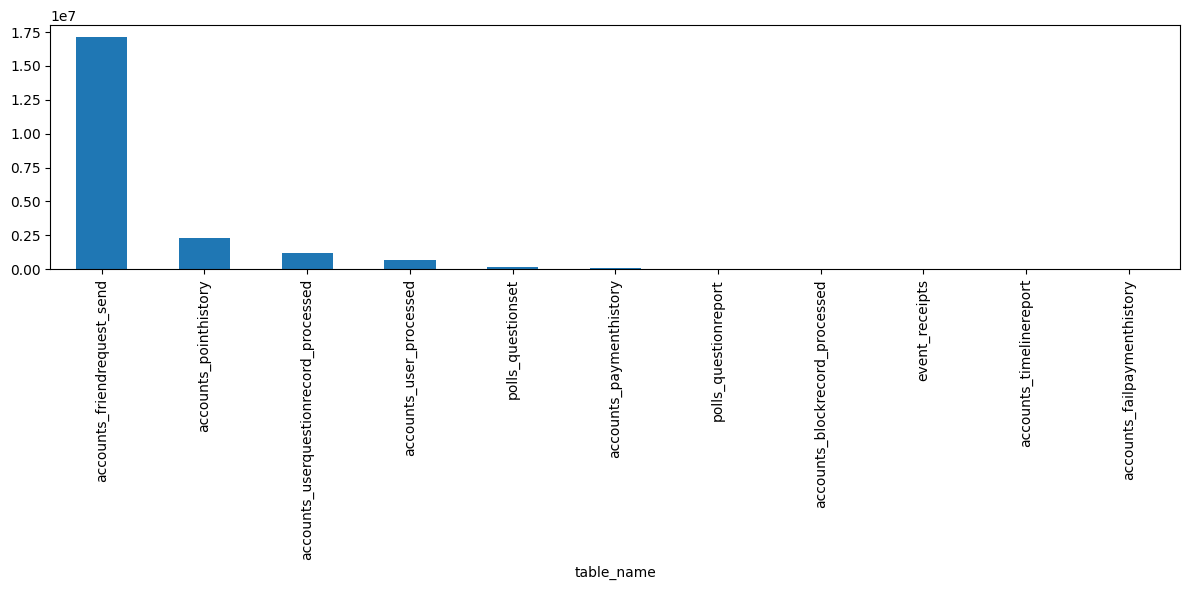

In [11]:
merged_df['table_name'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=90)
plt.tight_layout()

In [12]:
# 전체 이벤트 수
total_events = len(merged_df)

# 가입 이벤트 수 (가입자 수)
join_events = (merged_df['table_name'] == 'accounts_user_processed').sum()

# 가입 비율 계산
join_ratio = join_events / total_events * 100
print(f"전체 이벤트 중 가입자 비율: {join_ratio:.2f}% ({join_events} / {total_events})")

전체 이벤트 중 가입자 비율: 3.12% (677085 / 21705813)


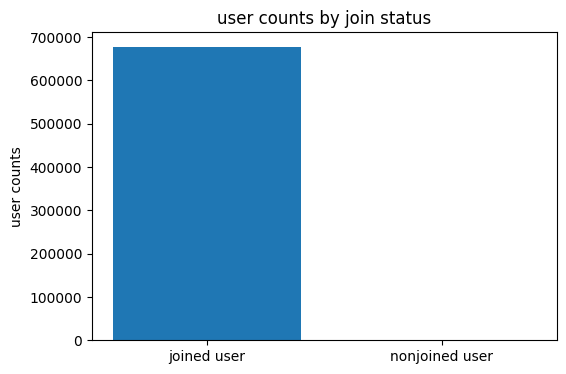

In [13]:
# 유저 기준 비율
total_users = merged_df['user_id'].nunique()
joined_users = merged_df[merged_df['table_name'] == 'accounts_user_processed']['user_id'].nunique()
non_joined_users = total_users - joined_users

# 막대그래프
plt.figure(figsize=(6, 4))
plt.bar(['joined user', 'nonjoined user'], [joined_users, non_joined_users])
plt.title('user counts by join status')
plt.ylabel('user counts')
plt.show()

In [14]:
# 날짜별 활동 수 시각화
plt.figure(figsize=(14, 6))
plt.plot(filtered_dates.index, filtered_dates.values)
plt.xticks(rotation=45)
plt.title("date-wise activity count")
plt.xlabel("Date")
plt.ylabel("Activity Count")
plt.tight_layout()
plt.show()

NameError: name 'filtered_dates' is not defined

<Figure size 1400x600 with 0 Axes>

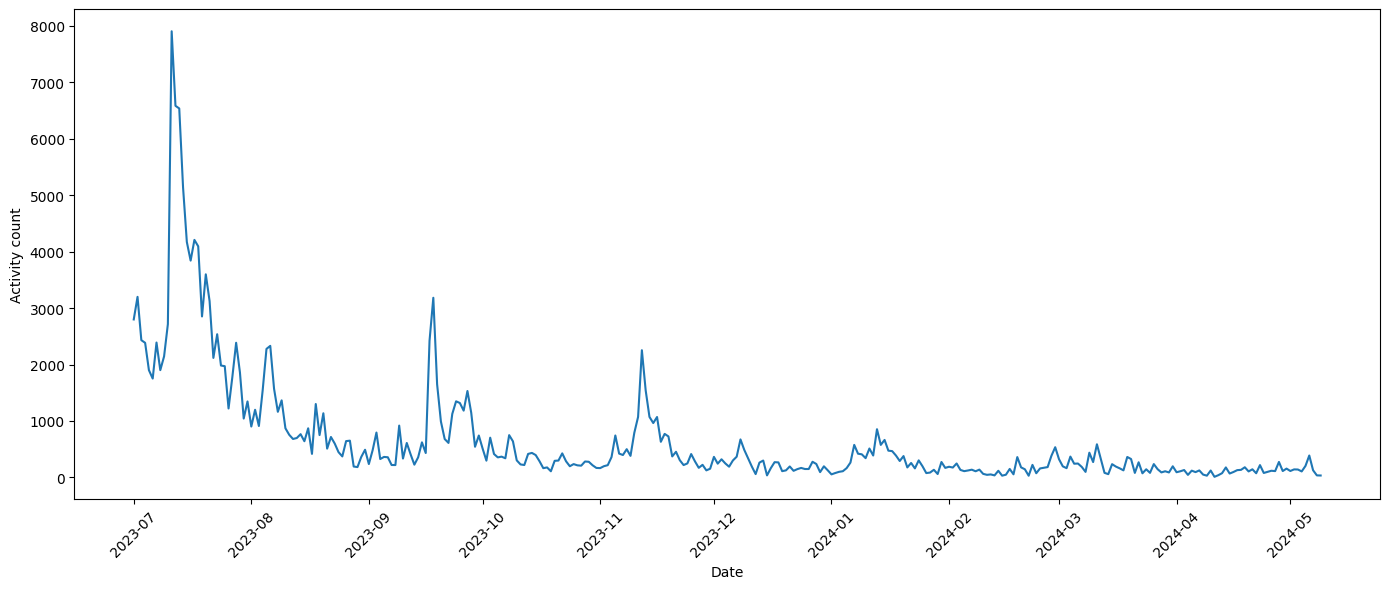

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=filtered_dates.index, y=filtered_dates.values)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Activity count")
plt.tight_layout()
plt.show()

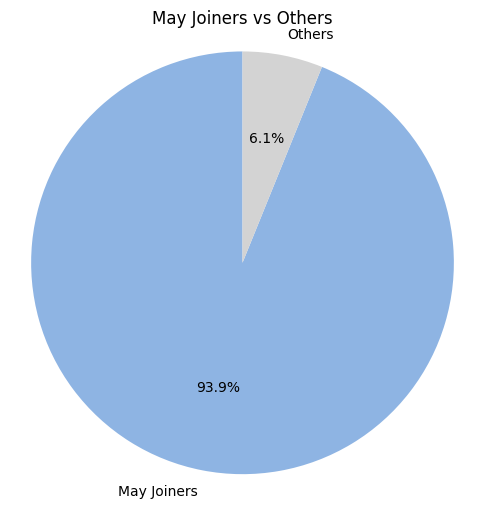

In [ ]:
# 가입자만 필터링
joined_df = merged_df[merged_df['table_name'] == 'accounts_user_processed'].copy()

# created_at을 datetime 형식으로 변환
joined_df['created_at'] = pd.to_datetime(joined_df['created_at'])

# 전체 가입자 수 (중복 제거)
total_joined = joined_df['user_id'].nunique()

# 5월에 가입한 사용자 수
may_joined = joined_df[joined_df['created_at'].dt.month == 5]['user_id'].nunique()

# 5월 외 가입자 수
non_may_joined = total_joined - may_joined

# 파이 차트 그리기
labels = ['May Joiners', 'Others']
sizes = [may_joined, non_may_joined]
colors = ['#8eb4e3', '#d3d3d3']  # 5월은 진한 하늘색

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('May Joiners vs Others')
plt.axis('equal')  # 원형 유지
plt.show()

### 2. 서비스 확산 패턴 확인 

- 바이럴의 핵심은 "어떻게 퍼졌나"
- 지리적 인접성 vs 소셜 연결성 파악
- 향후 마케팅 전략의 기초 데이터
- 학교별 확산 네트워크 분석(거리, 관계)
    - '시작_학교': '어느 학교에서 시작?’
    - '확산_순서': '학교 A → B → C 순서’
    - '확산_속도': '학교간 전파 소요 일수’
    - '지리적_관계': '가까운 학교끼리 퍼졌나?’
    - 사용자의 가입 시기별 학교 위치
- 시간대별 가입자 급증 포인트
- 초기 사용자의 영향력 →
    - 인기쟁이(친구 많은놈) 출몰 전후 해당 학교 가입율 비교
    
    [관계 네트워크 수치화 방법](https://www.notion.so/2060fabb1b9e808b9f16f55606ec1376?pvs=21)

In [ ]:
users = pd.read_csv("accounts_user_processed.csv")
groups = pd.read_csv("accounts_group.csv")

# 유저 → 그룹 → 학교
user_group = users.merge(groups, left_on="group_id", right_on="user_id", suffixes=('', '_group'))
school_ratio = user_group['school_id'].value_counts(normalize=True).round(4)

FileNotFoundError: [Errno 2] No such file or directory: 'accounts_user_processed.csv'

### 3. 이탈(유저가 남긴 마지막 발자취) 트리거

- 이탈 원인을 모르면 해결책도 없음
- "3일차에 50% 이탈" 같은 임계점 발견
- 개입 시점 결정의 근거
- 첫 이탈 시점: 가입 후 며칠?
- 대량 이탈 시점: 특정 이벤트?
- 이탈 직전 행동: 무엇을 마지막으로 했나?
- '마지막_행동': '투표? 타임라인? 아무것도 안함?’
- '마지막_접속_후_기간': '바로? 일주일 후?’
- '친구_영향': '친구 먼저 떠났나?’

In [ ]:
# 유료 여부 플래그
df['is_paid_user'] = df['user_id'].isin(payment['user_id'])

# 생존일 계산
survival_stats = merged_df.groupby('is_paid_user')['active_days'].agg(['mean', 'median', 'count'])